<a href="https://colab.research.google.com/github/larissavaladao/time_series_curuai/blob/main/6.%20parameters_by_period/1.set_periods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
#dados obidos = cotas
obidos = pd.read_csv('/content/drive/MyDrive/CURUAI_PROCESS/17050001_Cotas.csv').dropna(subset=['Media']).drop_duplicates(subset=['Data'])
obidos = obidos[['EstacaoCodigo', 'Data',  'Maxima', 'Minima', 'Media' ]].copy()
obidos['Data'] = pd.to_datetime(obidos['Data'])
obidos

,EstacaoCodigo,Data,Maxima,Minima,Media
0,17050001,2024-01-10,-64.0,-128.0,-102.0
3,17050001,2024-01-04,628.0,510.0,570.0
6,17050001,2024-01-03,510.0,414.0,467.0
9,17050001,2024-01-02,412.0,320.0,370.0
12,17050001,2024-01-01,318.0,160.0,251.0
...,...,...,...,...,...
1938,17050001,1968-01-07,579.0,502.0,544.0
1940,17050001,1968-01-06,648.0,583.0,617.0
1942,17050001,1968-01-05,646.0,575.0,621.0
1944,17050001,1968-01-04,570.0,478.0,521.0


In [56]:
# dados curuai = cotas
curuai = pd.read_csv('/content/drive/MyDrive/CURUAI_PROCESS/17060000_Cotas.csv').dropna(subset=['Media']).drop_duplicates(subset=['Data'])
curuai = curuai[['EstacaoCodigo', 'Data',  'Maxima', 'Minima', 'Media' ]].copy()
curuai['Data'] = pd.to_datetime(curuai['Data'])
curuai

,EstacaoCodigo,Data,Maxima,Minima,Media
4,17060000,2019-01-02,904.0,805.0,848.0
8,17060000,2019-01-01,805.0,683.0,747.0
12,17060000,2018-01-12,682.0,465.0,569.0
16,17060000,2018-01-11,461.0,418.0,431.0
20,17060000,2018-01-10,678.0,451.0,547.0
...,...,...,...,...,...
1375,17060000,1983-01-03,777.0,737.0,747.0
1379,17060000,1983-01-02,743.0,697.0,719.0
1383,17060000,1983-01-01,693.0,597.0,649.0
1387,17060000,1982-01-12,590.0,489.0,540.0


In [61]:
# concatenar dados das duas estações e restringir para o periodo de tempo que há dados em curuai
cotas = pd.concat([obidos, curuai]).sort_values(by='Data').set_index('Data')
cotas = cotas.loc[curuai['Data'].min():curuai['Data'].max()]

In [64]:
# reajustar indices para gerar gráfico
cotas = cotas.reset_index()
cotas

,Data,EstacaoCodigo,Maxima,Minima,Media
0,1982-01-09,17050001,514.0,315.0,425.0
1,1982-01-09,17060000,789.0,609.0,711.0
2,1982-01-10,17050001,308.0,142.0,217.0
3,1982-01-11,17050001,176.0,143.0,155.0
4,1982-01-12,17050001,311.0,184.0,246.0
...,...,...,...,...,...
853,2018-01-12,17060000,682.0,465.0,569.0
854,2019-01-01,17050001,529.0,410.0,473.0
855,2019-01-01,17060000,805.0,683.0,747.0
856,2019-01-02,17060000,904.0,805.0,848.0


<Axes: xlabel='Data', ylabel='Media'>

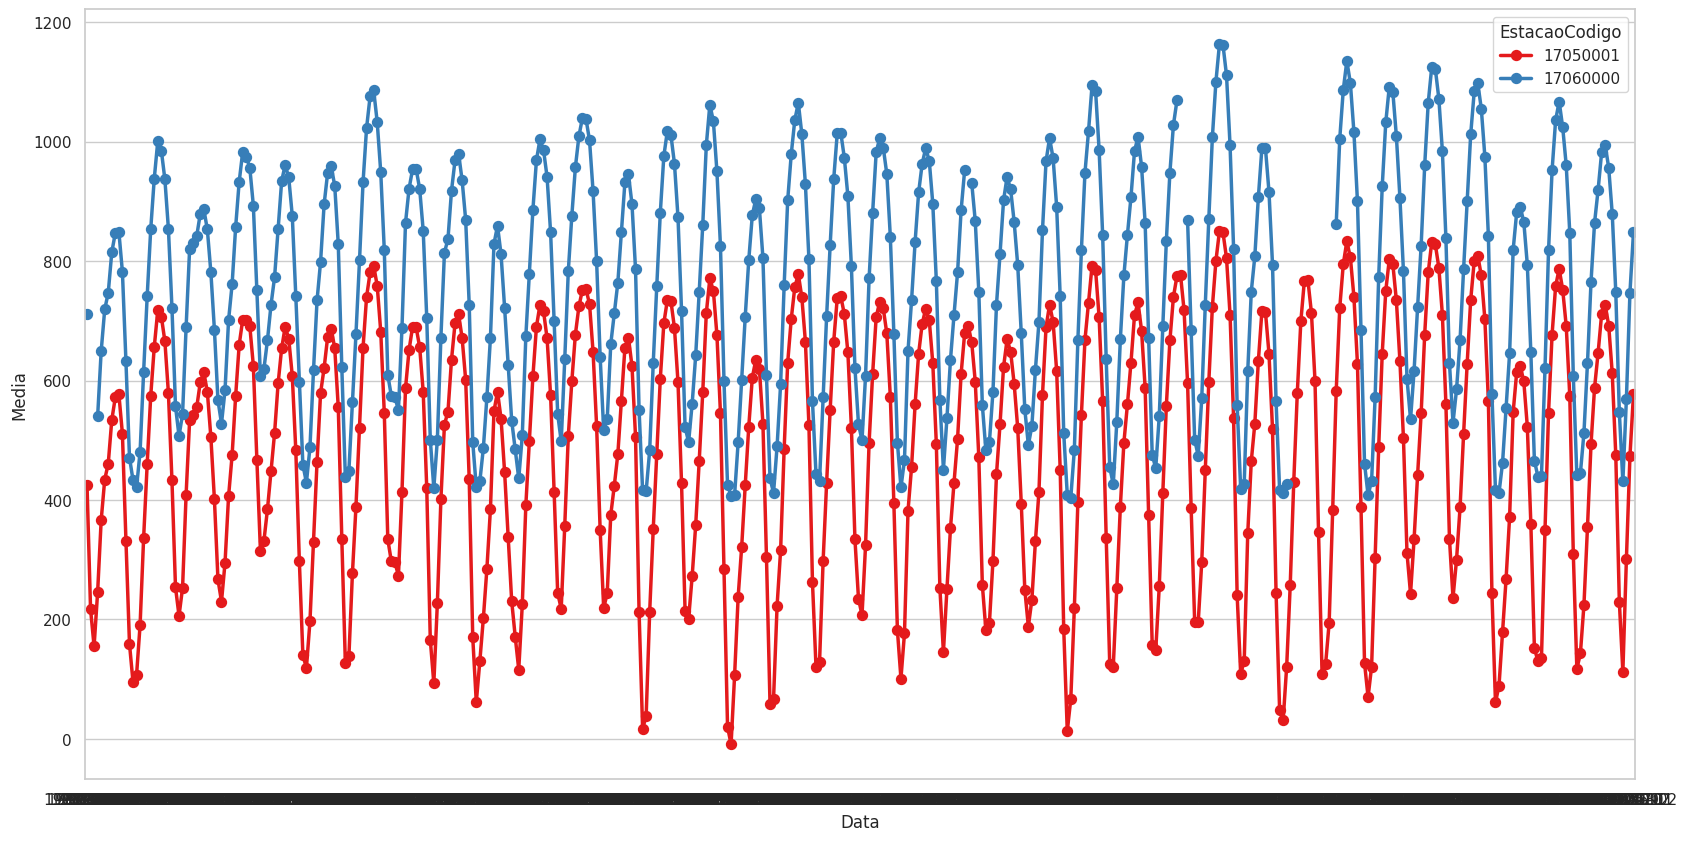

In [81]:
#comparar dados = seguem o mesmo padrão, aproximadamente
sns.set_theme(style="whitegrid",rc={'figure.figsize':(20,10)})
sns.pointplot(data=cotas,x = cotas['Data'],y = cotas['Media'], hue = cotas['EstacaoCodigo'], palette="Set1", linewidth=2.5)